In [1]:
import pandas as pd
import numpy as np
!python --version
df = pd.read_excel('DataAnalystjobs2023.xlsx', engine='openpyxl')
df.head()

Python 3.10.11


,ID,Date,Job Title,Job Location,Hired,Easy Apply
0,11736355,2023-08-21 10:00:00,BIOINFORMATICS DATA ANALYST,"Los Angeles, CA",True,False
1,11737984,2023-04-28 19:12:00,BIOINFORMATICS DATA ANALYST,"Los Angeles, CA",False,False
2,11899588,2023-10-02 13:00:00,BIOINFORMATICS DATA ANALYST,"New York, NY",True,False
3,11552956,2023-12-18 12:50:00,BUSINESS DATA ANALYST,"Greenwood Village, Arapahoe, CO",False,True
4,11553139,2023-11-30 01:26:00,BUSINESS DATA ANALYST,"Northridge, CA",False,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32596 entries, 0 to 32595
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            32596 non-null  int64         
 1   Date          32596 non-null  datetime64[ns]
 2   Job Title     32596 non-null  object        
 3   Job Location  32596 non-null  object        
 4   Hired         32596 non-null  bool          
 5   Easy Apply    32596 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ MB


In [3]:
df.describe()

,ID,Date
count,3.259600e+04,32596
mean,1.173212e+07,2023-07-05 05:01:39.595655936
min,2.436800e+04,2023-01-01 00:01:00
25%,1.165549e+07,2023-04-11 21:59:30
50%,1.175267e+07,2023-07-06 11:30:00
75%,1.184793e+07,2023-09-28 13:30:00
max,1.216837e+07,2023-12-31 23:30:00
std,4.943200e+05,NaN


In [4]:
df.isnull().sum()
# df = df.dropna()  # Or: df.fillna('N/A', inplace=True)


ID              0
Date            0
Job Title       0
Job Location    0
Hired           0
Easy Apply      0
dtype: int64

<Axes: title={'center': 'Top 10 Job Titles'}, ylabel='Job Title'>

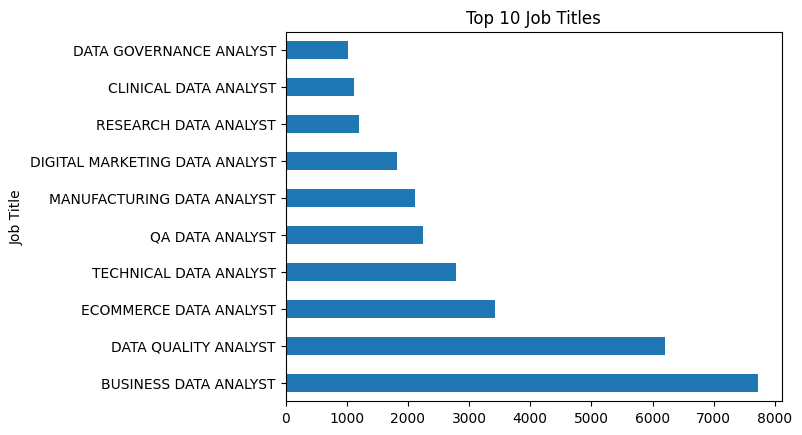

In [5]:
df['Job Title'].value_counts().head(10).plot(kind='barh', title='Top 10 Job Titles')

<Axes: title={'center': 'Top Locations'}, xlabel='Job Location'>

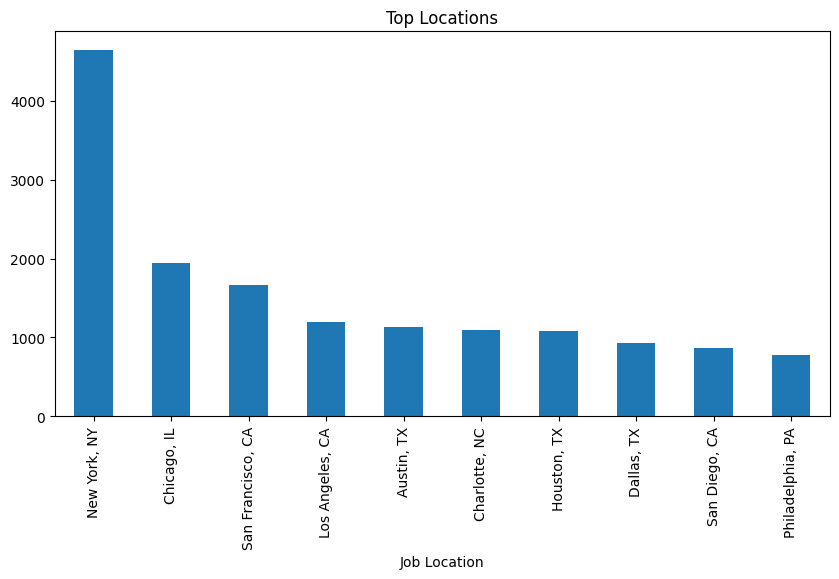

In [6]:
df['Job Location'].value_counts().head(10).plot(kind='bar', title='Top Locations', figsize=(10,5))


<Axes: title={'center': 'Hiring Status'}, ylabel='count'>

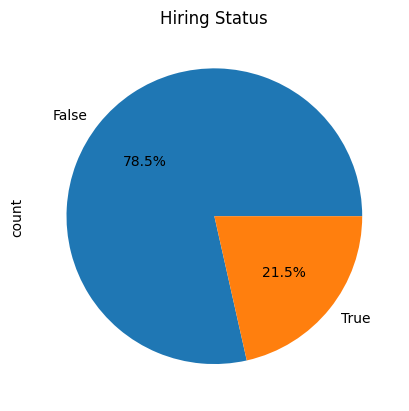

In [7]:
df['Hired'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Hiring Status')


<Axes: title={'center': 'Easy Apply Availability'}, xlabel='Easy Apply'>

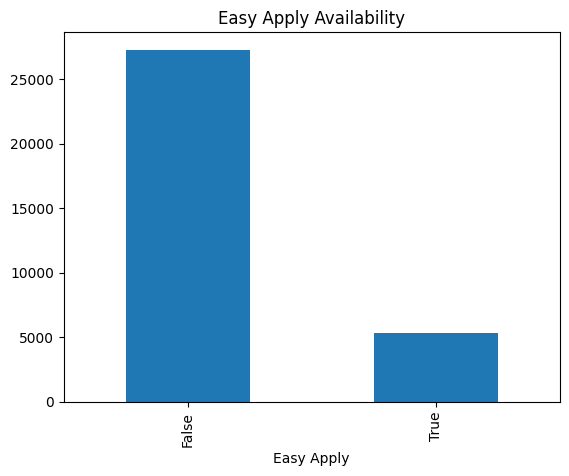

In [8]:
df['Easy Apply'].value_counts().plot(kind='bar', title='Easy Apply Availability')


<Axes: title={'center': 'Job Posting Trend Over Months'}, xlabel='Date'>

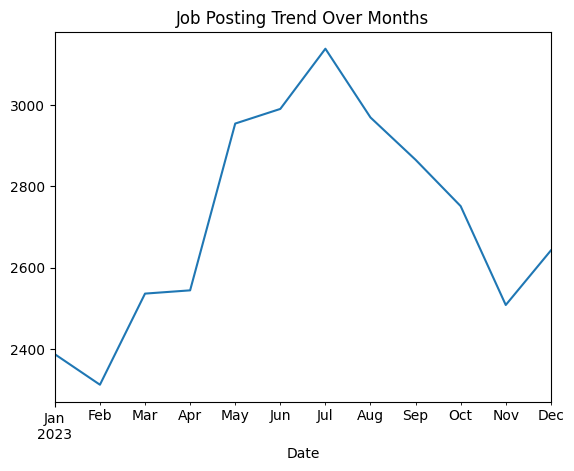

In [9]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure it's datetime
df['Date'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Job Posting Trend Over Months')


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab
crosstab = pd.crosstab(df['Easy Apply'], df['Hired'])

# Normalize for percentage view
crosstab_norm = pd.crosstab(df['Easy Apply'], df['Hired'], normalize='index') * 100

print("Raw Crosstab:\n", crosstab)
print("\nPercentage Crosstab:\n", crosstab_norm)


Raw Crosstab:
 Hired       False  True 
Easy Apply              
False       21153   6103
True         4441    899

Percentage Crosstab:
 Hired           False      True 
Easy Apply                      
False       77.608600  22.391400
True        83.164794  16.835206


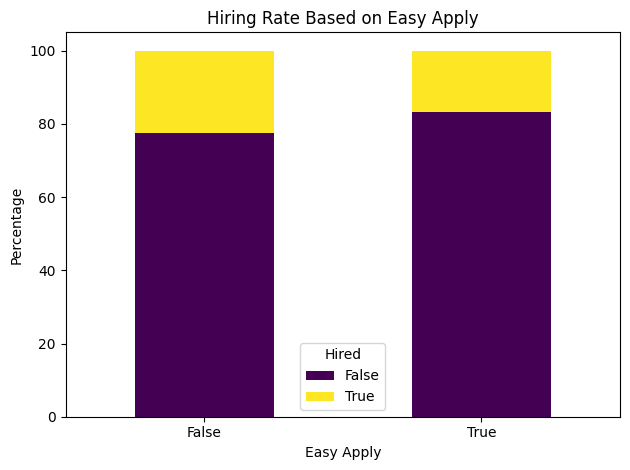

In [11]:
crosstab_norm.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Hiring Rate Based on Easy Apply")
plt.ylabel("Percentage")
plt.xlabel("Easy Apply")
plt.legend(title='Hired')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

2025-07-04 13:25:36.384 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:25:36.386 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:25:38.008 
  command:

    streamlit run C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-04 13:25:38.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:25:38.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:25:43.001 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:25:43.004 Thread 'MainThread': missing ScriptRunContext! This wa

DeltaGenerator()

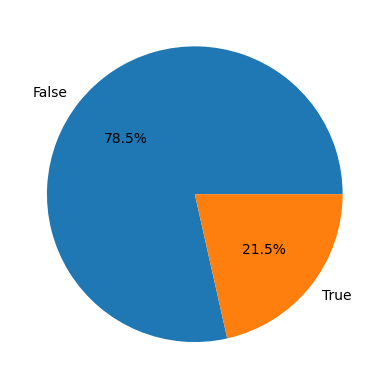

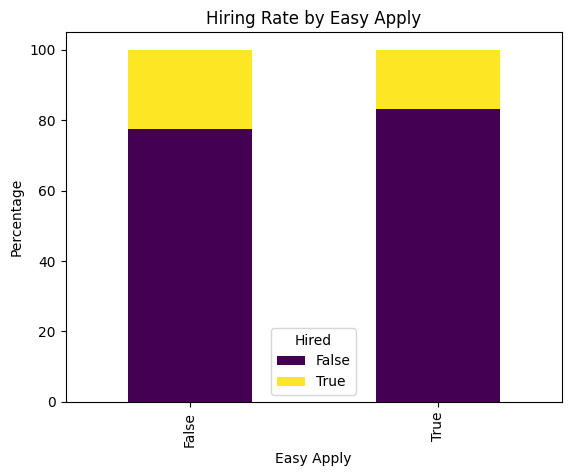

In [12]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(layout='wide')
st.title("📊 Data Analyst Jobs Dashboard (2023)")

# Load data
df = pd.read_excel("DataAnalystjobs2023.xlsx", engine="openpyxl")

# Clean data
df['Date'] = pd.to_datetime(df['Date'])
df['City'] = df['Job Location'].str.split(',').str[0]

# 1. Top Job Titles
st.subheader("Top Job Titles")
st.bar_chart(df['Job Title'].value_counts().head(10))

# 2. Top Locations
st.subheader("Top Locations")
st.bar_chart(df['Job Location'].value_counts().head(10))

# 3. Hiring Status
st.subheader("Hiring Status")
fig1, ax1 = plt.subplots()
df['Hired'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1)
ax1.set_ylabel("")
st.pyplot(fig1)

# 4. Easy Apply Jobs
st.subheader("Easy Apply Availability")
st.bar_chart(df['Easy Apply'].value_counts())

# 5. Job Posting Trend
st.subheader("Job Posting Trend Over Time")
monthly_trend = df['Date'].dt.to_period('M').value_counts().sort_index()
st.line_chart(monthly_trend)

# 6. Easy Apply vs Hired Correlation
st.subheader("Easy Apply vs Hired Rate")
crosstab = pd.crosstab(df['Easy Apply'], df['Hired'], normalize='index') * 100
fig2, ax2 = plt.subplots()
crosstab.plot(kind='bar', stacked=True, colormap='viridis', ax=ax2)
ax2.set_ylabel("Percentage")
ax2.set_title("Hiring Rate by Easy Apply")
st.pyplot(fig2)


In [13]:
AllCSV = [i for i in glob.glob('*.{}'.format('csv'))]
AllCSV

NameError: name 'glob' is not defined